# Everybody Hates Gender Inequality And Financial Crisis

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQTtLhY7oZS5uf_uQ7KXF1ZB2s1Ryk50SV6Eg&usqp=CAU) 

Lemme give you a brief about the data :)
*  country name : Name of the country
*  country code: Code of the country
*  Date : year
*  GDI: Gender Development Index
*  GII: Gender Inequality Index
*  FIDI: Financial Institutions Depth Index
*  FII: Financial Institutions Index
*  FMI: Financial Markets Index
*  FIAI: Financial Institutions Access Index
*  FMDI: Financial Markets Depth Index
*  FMAI: Financial Markets Access Index
*  FDI: Financial Development Index
*  FMEI: Financial Markets Efficiency Index
*  FIEI: Financial Institutions Efficiency Index


# Importing the package

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly 
import plotly.graph_objs as go
from sklearn.neighbors import KNeighborsRegressor
plotly.offline.init_notebook_mode (connected = True)

# Having a look at the data

In [ ]:
data=pd.read_csv('../input/countries-gender-ineq-and-financials-over-time/countries.csv')

In [ ]:
data.head()

# Checking for null values

In [ ]:
data.isna().sum()

# Let's have a look at the map for Gender Inequality Index

In [ ]:
data_slider=[]
for year in data.Date.unique():
    df=data[data['Date']==year]
    
    data_one_year = dict(
                    type='choropleth',
                    locations = list(df['Country Name'].values),
                    z=df['GII'].astype(float),
                    locationmode='country names',
                    text = df['GDI']
                    )
    data_slider.append(data_one_year)
steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(i + 1990)) # label to be displayed for each step (year)
    step['args'][1][i] = True
    steps.append(step)


	
##  I create the 'sliders' object from the 'steps' 

sliders = [dict(active=0, pad={"t": 1}, steps=steps)] 

layout = dict(geo=dict(scope='world'),
              sliders=sliders)


	
# I create the figure object:

fig = dict(data=data_slider, layout=layout) 



	
# to plot in the notebook

plotly.offline.iplot(fig)



### GII is the gender inequality index .It shows the loss in potential human development due to disparity between female and male achievements in three dimensions: reproductive health, empowerment and the labour market. Overall, the GII reflects how women are disadvantaged in these dimensions. The GII ranges between 0 and 1. 

### High GII means greater disparity between men and women

### From this data we can clearly see that most of the countries were not having a good GDI in 1990 but as the timeline increased we can see the changes . People's prospective is changing and GII is clearly decreasing.



# Let's have a look at the relationship between Gender development index (GDI) and Financial DEvelopment Index(FDI)

In [ ]:
plt.style.use("dark_background")
sns.jointplot(data=data,x='GDI',y='FDI',kind='reg',color='orange',joint_kws={'line_kws':{'color':'cyan'}})


Well we can clearly see the direct relationship between the GDI and FDI which explains that when the equality in the nation increases it also increases the opportunity for the both genders making the economic condition of the country better and increasing the financial index of the country ....

# Change in GII with respect to change in years

In [ ]:
group=data.groupby('Date').mean()
x=group.index.values
y=group.GII
plt.bar(x,y)

# Does GDI effect Stock Market ??

#### FMDI includes the size of the stock market and tells us how active the stock market of the country is 

In [ ]:
X=data.GDI
y=data.FMDI
X = X.values.reshape(-1, 1)
x_range = np.linspace(X.min(), X.max(), 100)
knn_dist = KNeighborsRegressor(30, weights='uniform')
knn_dist.fit(X,y)

y_dist = knn_dist.predict(x_range.reshape(-1, 1))
fig = px.scatter(
    data, x='GDI', y='FMDI', opacity=0.4,    trendline='ols', trendline_color_override='orange',labels={'trendline':'Linear Regression'}

 
)
fig.add_traces(go.Scatter(x=x_range, y=y_dist, name='KNN regressor: Distance',marker_color='green'))

fig.show()

### Thats kinda awesome we can clearly see that FMDI and GDI has a clear linear relationship between each other :)

### Green line is the plot with the help of KNN regressor and orange line is the regression plot 

# Does GDI of a country effect it's market effeciency

In [ ]:
X=data.GDI
y=data.FMDI
X = X.values.reshape(-1, 1)
x_range = np.linspace(X.min(), X.max(), 100)
knn_dist = KNeighborsRegressor(30, weights='uniform')
knn_dist.fit(X,y)

y_dist = knn_dist.predict(x_range.reshape(-1, 1))
fig = px.scatter(
    data, x='GDI', y='FMEI', opacity=0.4,    trendline='ols', trendline_color_override='orange',labels={'trendline':'Linear Regression'}

 
)
fig.add_traces(go.Scatter(x=x_range, y=y_dist, name='KNN regressor: Distance',marker_color='green'))

fig.show()

### Well we can see that there is a positive linear relation between GDI and FMEI which shows that higher development of gender in a country positively effects the market effeciency of the country....

# Having a look at all the data

In [ ]:
g = sns.PairGrid(data[['GII','GDI','FII','FMAI']])
g.map_diag(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)


We Can clearly see the relationships between GII(Gender Inequality index) , GDI(gender development Index) FII( Financial institutional index) and FMAI(Market Effeciency index ) from the above data .


# Hope you all liked the file :)

# And Let's aim to get GII ----> 0 :)

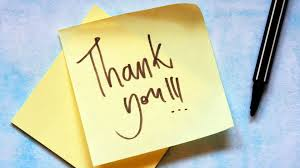